In [68]:
# Step 1: Imports and Load Dataset
import pandas as pd
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Step 2. Load Dataset
df = pd.read_csv("fake_new_dataset.csv")
df.dropna(inplace=True)
df

,Unnamed: 0,title,text,subcategory,label
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0
...,...,...,...,...,...
3114,2998,2019-nCoV: Health dept. on full alert,Quarantine advised for 80 persons across the S...,true,1
3115,2999,Screening machine for corona virus launched at...,South Sudan has begun screening all travelers ...,true,1
3116,3000,Coronavirus (2019-nCoV),Coronavirus (2019-nCoV) is a new respiratory i...,true,1
3117,3001,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,false news,0


In [32]:
# 3. Text Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)
df['clean_text'] = df['text'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,title,text,subcategory,label,clean_text
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,facebook shuttered popular group michigander o...
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,officially put rest comparison covid influenza...
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,ministry health bermuda confirmed newspaper re...
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,purdue university president mitch daniel forme...
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,locking much country may helped flatten curve ...


In [23]:
#Step 4. TF-IDF Feature Extraction
tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=3,
    ngram_range=(1, 2),
    stop_words='english'
)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

In [24]:
#Step 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

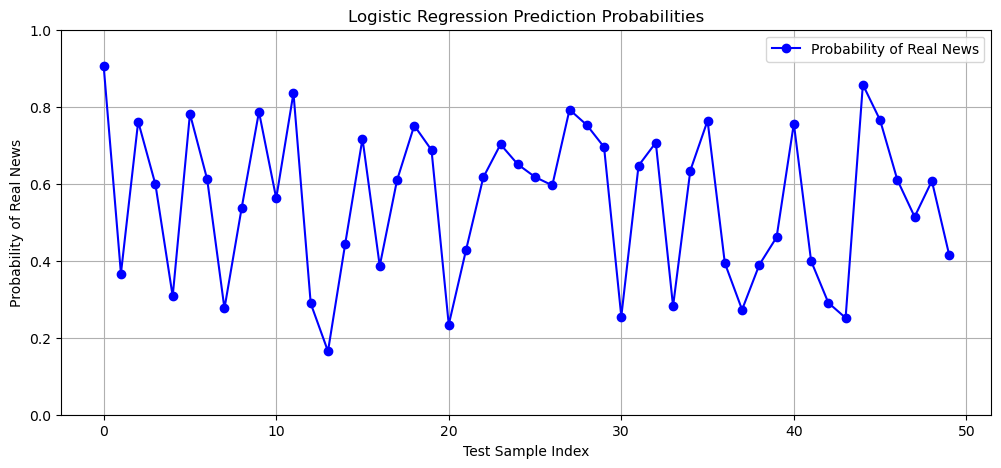

In [41]:
# 6. Train Models
#Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
probs = lr.predict_proba(X_test)[:,1] 
plt.figure(figsize=(12,5))
plt.plot(range(50), probs[:50], marker='o', color='blue', linestyle='-', label='Probability of Real News')
plt.title("Logistic Regression Prediction Probabilities")
plt.xlabel("Test Sample Index")
plt.ylabel("Probability of Real News")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

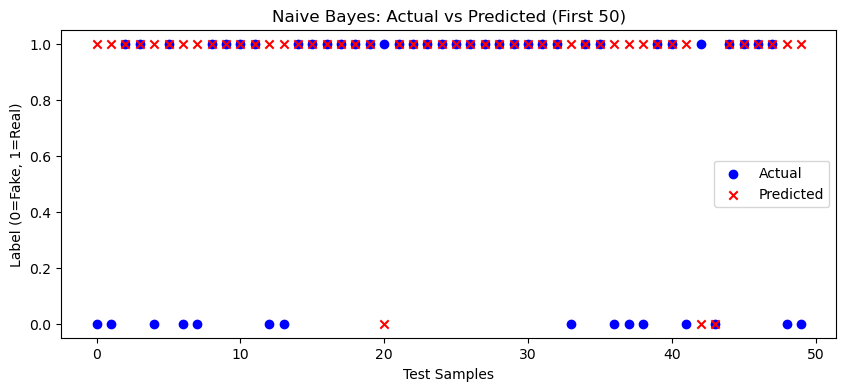

In [36]:
# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Scatter plot: predicted vs actual (first 50 samples)
plt.figure(figsize=(10,4))
plt.scatter(range(50), y_test[:50], color='blue', label='Actual')
plt.scatter(range(50), y_pred_nb[:50], color='red', label='Predicted', marker='x')
plt.title("Naive Bayes: Actual vs Predicted (First 50)")
plt.xlabel("Test Samples")
plt.ylabel("Label (0=Fake, 1=Real)")
plt.legend()
plt.show()

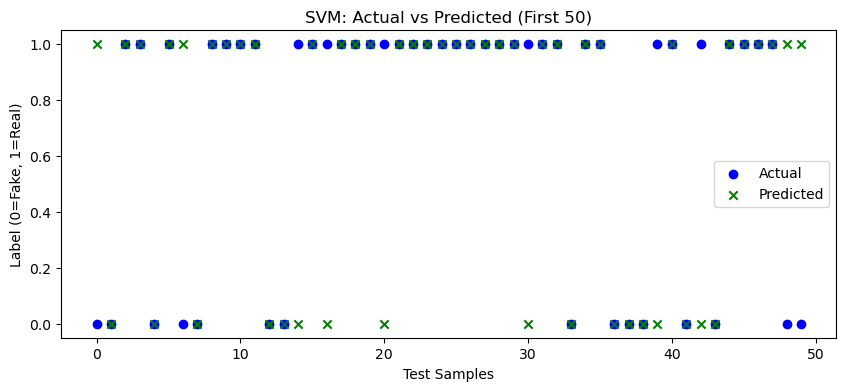

In [37]:
# Step 6: Support Vector Machine
svm = LinearSVC(class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

plt.figure(figsize=(10,4))
plt.scatter(range(50), y_test[:50], color='blue', label='Actual')
plt.scatter(range(50), y_pred_svm[:50], color='green', label='Predicted', marker='x')
plt.title("SVM: Actual vs Predicted (First 50)")
plt.xlabel("Test Samples")
plt.ylabel("Label (0=Fake, 1=Real)")
plt.legend()
plt.show()


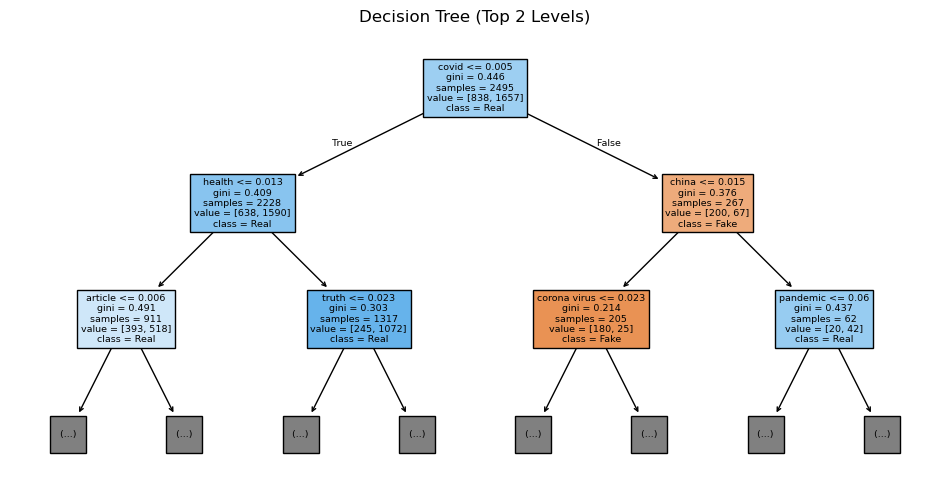

In [38]:
# Step 7: Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=tfidf.get_feature_names_out(), class_names=["Fake","Real"], max_depth=2)
plt.title("Decision Tree (Top 2 Levels)")
plt.show()


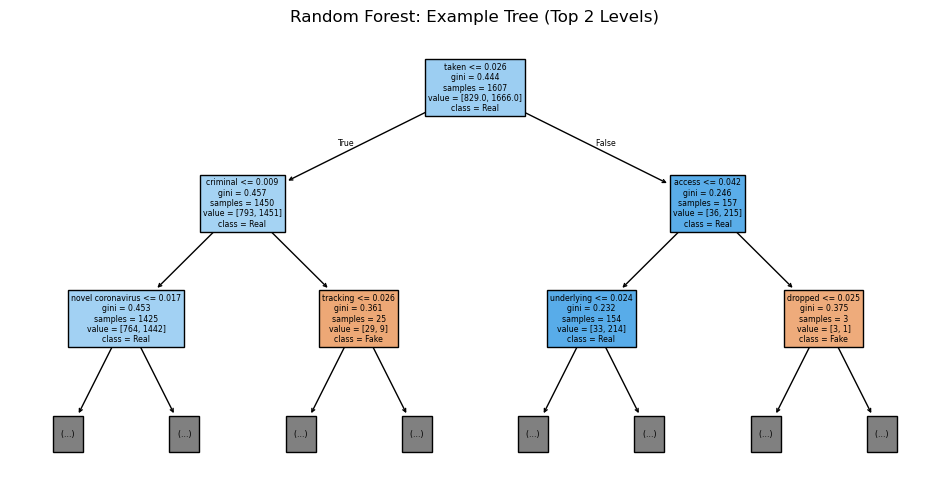

In [40]:
# Step 8: Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Plot one tree from forest
plt.figure(figsize=(12,6))
plot_tree(rf.estimators_[0], filled=True, feature_names=tfidf.get_feature_names_out(), class_names=["Fake","Real"], max_depth=2)
plt.title("Random Forest: Example Tree (Top 2 Levels)")
plt.show()

In [26]:
# Step 7
#Accuracy
print("\nMODEL ACCURACY")
print("-------------------------")
print("Logistic Regression:", accuracy_score(y_test, lr.predict(X_test)))
print("Naive Bayes        :", accuracy_score(y_test, nb.predict(X_test)))
print("SVM               :", accuracy_score(y_test, svm.predict(X_test)))
print("Decision Tree     :", accuracy_score(y_test, dt.predict(X_test)))
print("Random Forest     :", accuracy_score(y_test, rf.predict(X_test)))


MODEL ACCURACY
-------------------------
Logistic Regression: 0.8189102564102564
Naive Bayes        : 0.6826923076923077
SVM               : 0.7996794871794872
Decision Tree     : 0.7243589743589743
Random Forest     : 0.7964743589743589


In [51]:
# Precision
print("\nMODEL PRECISION")
print("-------------------------")
print("Logistic Regression:", precision_score(y_test, lr.predict(X_test)))
print("Naive Bayes        :", precision_score(y_test, nb.predict(X_test)))
print("SVM               :", precision_score(y_test, svm.predict(X_test)))
print("Decision Tree     :", precision_score(y_test, dt.predict(X_test)))
print("Random Forest     :", precision_score(y_test, rf.predict(X_test)))


MODEL PRECISION
-------------------------
Logistic Regression: 0.8702290076335878
Naive Bayes        : 0.6751700680272109
SVM               : 0.8297872340425532
Decision Tree     : 0.7705627705627706
Random Forest     : 0.7664670658682635


In [52]:
# Recall
print("\nMODEL RECALL")
print("-------------------------")
print("Logistic Regression:", recall_score(y_test, lr.predict(X_test)))
print("Naive Bayes        :", recall_score(y_test, nb.predict(X_test)))
print("SVM               :", recall_score(y_test, svm.predict(X_test)))
print("Decision Tree     :", recall_score(y_test, dt.predict(X_test)))
print("Random Forest     :", recall_score(y_test, rf.predict(X_test)))


MODEL RECALL
-------------------------
Logistic Regression: 0.8465346534653465
Naive Bayes        : 0.9826732673267327
SVM               : 0.8688118811881188
Decision Tree     : 0.8811881188118812
Random Forest     : 0.9504950495049505


In [53]:
# F1-Score
print("\nMODEL F1-SCORE")
print("-------------------------")
print("Logistic Regression:", f1_score(y_test, lr.predict(X_test)))
print("Naive Bayes        :", f1_score(y_test, nb.predict(X_test)))
print("SVM               :", f1_score(y_test, svm.predict(X_test)))
print("Decision Tree     :", f1_score(y_test, dt.predict(X_test)))
print("Random Forest     :", f1_score(y_test, rf.predict(X_test)))


MODEL F1-SCORE
-------------------------
Logistic Regression: 0.8582183186951067
Naive Bayes        : 0.8004032258064516
SVM               : 0.848851269649335
Decision Tree     : 0.8221709006928406
Random Forest     : 0.8486187845303867


In [42]:
# 8. Prediction Function (Using SVM)
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vector = tfidf.transform([cleaned])
    result = svm.predict(vector)

    if result[0] == 0:
        return "Fake News"
    else:
        return "Real News"

In [43]:
# 9. User Input
print("\nEnter news text to predict (press Enter twice):")
news_input = ""
while True: 
    line = input()
    if line == "":
        break
    news_input += line + " "
if news_input.strip():
    print("\nPrediction:", predict_news(news_input))
else: 
    print("No news entered.")


Enter news text to predict (press Enter twice):


 s
 



Prediction: Fake News


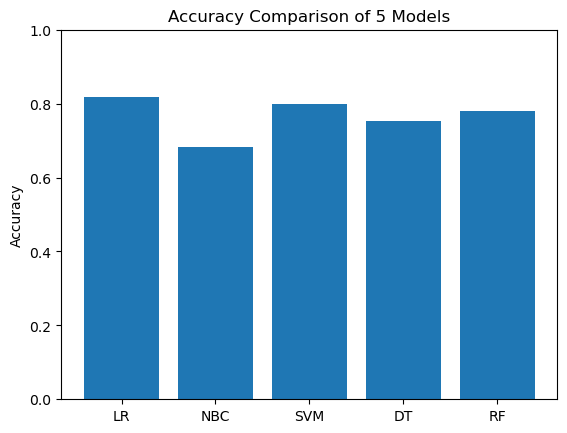

In [56]:
# Accuracy Comparison of 5 Models
models = ["LR", "NBC", "SVM", "DT", "RF"]
accuracy = [
    accuracy_score(y_test, lr.predict(X_test)),
    accuracy_score(y_test, nb.predict(X_test)),
    accuracy_score(y_test, svm.predict(X_test)),
    accuracy_score(y_test, dt.predict(X_test)),
    accuracy_score(y_test, rf.predict(X_test))
]
plt.bar(models, accuracy)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of 5 Models")
plt.show()

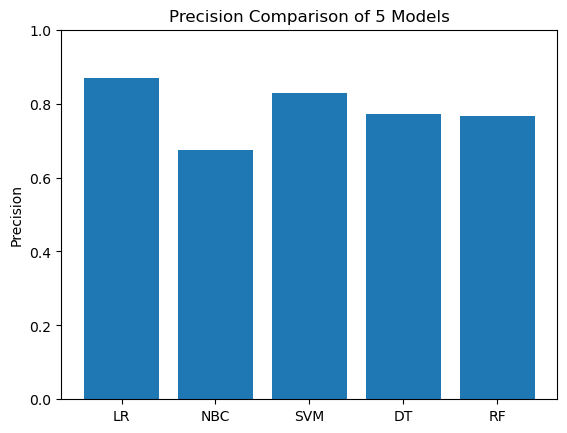

In [57]:
# Precision Comparison of 5 Models
models = ["LR", "NBC", "SVM", "DT", "RF"]
precision = [
    precision_score(y_test, lr.predict(X_test)),
    precision_score(y_test, nb.predict(X_test)),
    precision_score(y_test, svm.predict(X_test)),
    precision_score(y_test, dt.predict(X_test)),
    precision_score(y_test, rf.predict(X_test))
]

plt.bar(models, precision)
plt.ylim(0,1)
plt.ylabel("Precision")
plt.title("Precision Comparison of 5 Models")
plt.show()

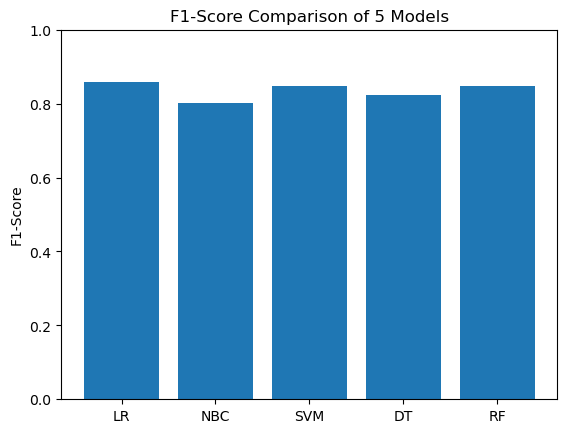

In [58]:
# F1-Score Comparison of 5 Models
models = ["LR", "NBC", "SVM", "DT", "RF"]
f1 = [
    f1_score(y_test, lr.predict(X_test)),
    f1_score(y_test, nb.predict(X_test)),
    f1_score(y_test, svm.predict(X_test)),
    f1_score(y_test, dt.predict(X_test)),
    f1_score(y_test, rf.predict(X_test))
]
plt.bar(models, f1)
plt.ylim(0,1)
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison of 5 Models")
plt.show()

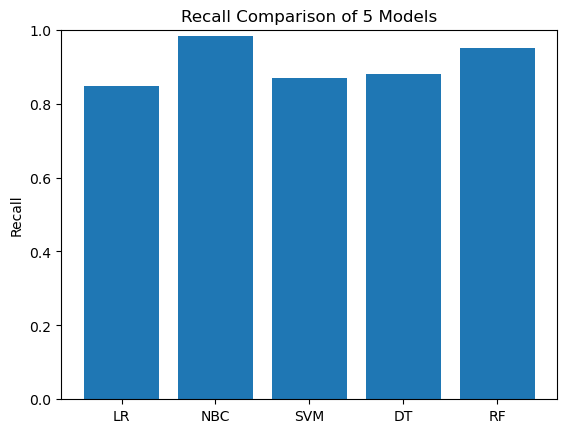

In [59]:
# Recall Comparison of 5 Models
models = ["LR", "NBC", "SVM", "DT", "RF"]
recall = [
    recall_score(y_test, lr.predict(X_test)),
    recall_score(y_test, nb.predict(X_test)),
    recall_score(y_test, svm.predict(X_test)),
    recall_score(y_test, dt.predict(X_test)),
    recall_score(y_test, rf.predict(X_test))
]
plt.bar(models, recall)
plt.ylim(0,1)
plt.ylabel("Recall")
plt.title("Recall Comparison of 5 Models")
plt.show()

In [62]:
# Accuracy
accuracy = [accuracy_score(y_test, lr.predict(X_test)), accuracy_score(y_test, nb.predict(X_test)), accuracy_score(y_test, svm.predict(X_test)), accuracy_score(y_test, dt.predict(X_test)), accuracy_score(y_test, rf.predict(X_test))]

# Precision
precision = [precision_score(y_test, lr.predict(X_test)), precision_score(y_test, nb.predict(X_test)), precision_score(y_test, svm.predict(X_test)), precision_score(y_test, dt.predict(X_test)), precision_score(y_test, rf.predict(X_test))]

# Recall
recall = [recall_score(y_test, lr.predict(X_test)), recall_score(y_test, nb.predict(X_test)), recall_score(y_test, svm.predict(X_test)), recall_score(y_test, dt.predict(X_test)), recall_score(y_test, rf.predict(X_test))]

# F1-Score
f1 = [f1_score(y_test, lr.predict(X_test)), f1_score(y_test, nb.predict(X_test)), f1_score(y_test, svm.predict(X_test)), f1_score(y_test, dt.predict(X_test)), f1_score(y_test, rf.predict(X_test))]

# Create table
results_df = pd.DataFrame({"Model":["LR","NBC","SVM","DT","RF"],
                           "Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1-Score":f1})
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LR,0.818910,0.870229,0.846535,0.858218
1,NBC,0.682692,0.675170,0.982673,0.800403
2,SVM,0.799679,0.829787,0.868812,0.848851
3,DT,0.753205,0.770563,0.881188,0.822171
4,RF,0.780449,0.766467,0.950495,0.848619


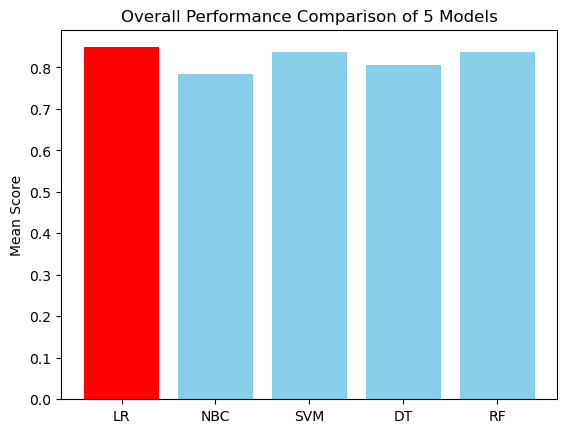

In [66]:
# Calculate mean score for each model
results_df["Mean_Score"] = results_df[["Accuracy","Precision","Recall","F1-Score"]].mean(axis=1)

# Overall comparison bar plot
plt.bar(results_df["Model"], results_df["Mean_Score"], 
        color=["red" if x==results_df["Mean_Score"].max() else "skyblue" for x in results_df["Mean_Score"]])
plt.ylabel("Mean Score")
plt.title("Overall Performance Comparison of 5 Models")
plt.show()

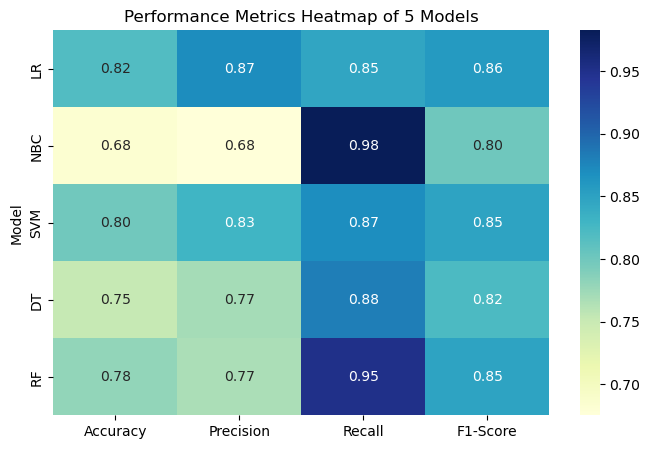

In [69]:
metrics_df = results_df.drop(columns=["Mean_Score"], errors='ignore').set_index("Model")

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Performance Metrics Heatmap of 5 Models")
plt.show()